# Problem Statement
Calculate secondhand  Cars selling Price by analysis Present price of the car,how much km car driven,Fuel type,Seller Type,transmission,owner 


# Import all library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Column Description

 |Column | Description| 
| ------ | ---------- |
| Car Name  | Car model|
| Year  |When owner purchase the car|
| Selling_Price |After using what is price of that  secondhand car |
| Present_Price |what is the car present price|
| Kms_Driven |How much km car has driven by the owner|
| Fuel_type  |Which type of fuel tank of that car(Petrol,Diesel,CNG)|
| Seller_type | From whom you bought the car(Dealer,Manual)|
| Transmission | Which type of gear in that car(Manual,Automatic)|
| Owner |No of owners the car previously had|

# Load Dataset

In [2]:
df=pd.read_csv("car data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


Data info shows all information about the dataset like how many columns and rows present in the dataset,shows every column datatype 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


isna() shows in this datatype any null value present or not in that dataset <br>
if nay null value is there we have to remove that<br>
1)if null_value>3% we have to we dropna<br>
2) if null value > 3% and < 50% we will fill that null value by using mean,median,mode<br>
     a)if there is no skewness in that column means the data is nomally distributed we will use mean()<br>
     b) if there is skewness present we will use median<br>
     c) if the value is categorical we will use mode<br>
3)if null_value>50% we will drop that column


In [4]:
df.isna().sum()/len(df)*100

Car_Name         0.0
Year             0.0
Selling_Price    0.0
Present_Price    0.0
Kms_Driven       0.0
Fuel_Type        0.0
Seller_Type      0.0
Transmission     0.0
Owner            0.0
dtype: float64

By using describe we can check mean,median,mode,precentile,mac,count,std<br>
By seeing the difference between mean() and 50%  means median  we can check is there nay skewness present or not

In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Here we use for loop to see all the unique value present in each column with count

In [6]:
for i in df:
    print(df[i].value_counts())

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64
0.45     8
0.60     8
5.25     7
4.50     7
0.20     6
        ..
3.80     1
3.45     1
5.90     1
35.00    1
11.50    1
Name: Selling_Price, Length: 156, dtype: int64
9.40     15
13.60    13
5.70      8
4.43      7
1.47      7
         ..
18.54     1
7.27      1
15.04     1
10.21     1
12.50     1
Name: Present_Price, Length: 147, dtype: int64
45000    9
15000    9
40000    5
35000    5
50000    5
        ..
1400

Here 2023 is my current year,To calculate the present selling price of that car after using we have to see that what is the age of that car

In [7]:
df["No Year"]=2023-df["Year"]

In [8]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No Year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,9
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,7
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,8
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,14
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,6


There is no need of car_name and year because we have already calculate the present age of the car
that's why we drop the unnecessary column

In [9]:
df.drop(["Car_Name","Year"],axis=1,inplace=True)

In [10]:
df

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No Year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,7
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,8
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,14
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,6


Convert all categorical data into numerical data by using Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:
df['Fuel_Type']=le.fit_transform(df['Fuel_Type'])
df['Seller_Type']=le.fit_transform(df['Seller_Type'])
df['Transmission']=le.fit_transform(df['Transmission'])

In Fuel_Type column *)CNG=0,Diesel=1,Petrol=2<br>
In Seller_Type Column *) Dealer=0,individual=1<br>
In Transmission column *)Autometic=0,Manual=1<br>



In [13]:
df

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No Year
0,3.35,5.59,27000,2,0,1,0,9
1,4.75,9.54,43000,1,0,1,0,10
2,7.25,9.85,6900,2,0,1,0,6
3,2.85,4.15,5200,2,0,1,0,12
4,4.60,6.87,42450,1,0,1,0,9
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,1,0,1,0,7
297,4.00,5.90,60000,2,0,1,0,8
298,3.35,11.00,87934,2,0,1,0,14
299,11.50,12.50,9000,1,0,1,0,6


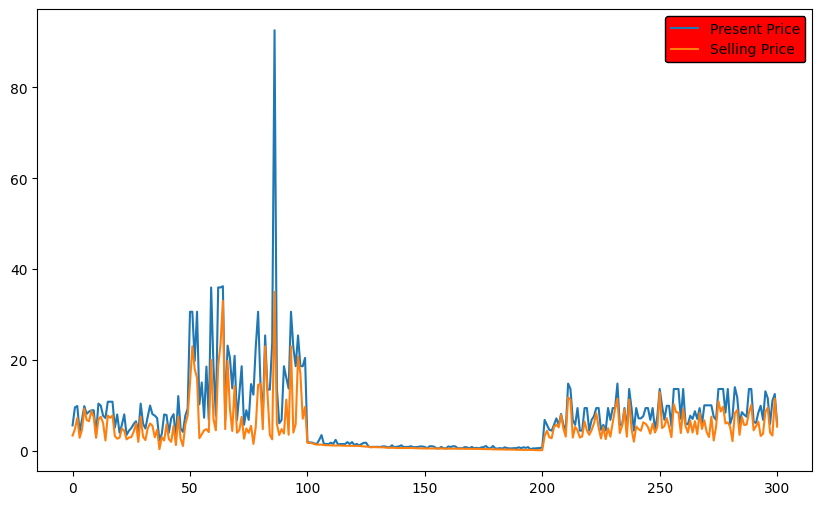

In [14]:
plt.figure(figsize=(10,6))
plt.plot(df["Present_Price"],label='Present Price')
plt.plot(df["Selling_Price"],label="Selling Price")
plt.legend(framealpha=1,shadow=False,fancybox=True,facecolor="r",edgecolor='k')

plt.show()

Heatmap shows the corelation between every column with each column present in the dataset
#) Here we can see that the co-relation between present_price and selling_price is most strong
and the corelation between selling_price and Individual is most worst

<Axes: >

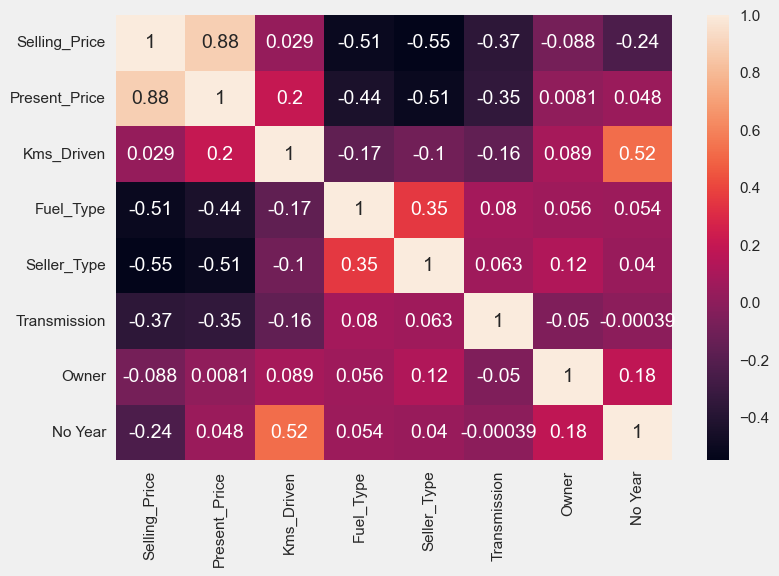

In [64]:
sns.heatmap(df.corr(),annot=True)

By analysing the pairplot we can properli describe the dataset
1) In this selling_price and no_year plot we can see that the car which have less age those car price is high,age increase means the price is decresing<br>
2)In this selling_price and Owner plot we can see that if there is single owner the car price is more and when the no of owner is increasing the value is decreasing<br>
3)In this selling_price and Transmission plot we can see that the autometic car price is more<br>
4)In this selling_price and seller_type plot we see that if you buy the car from dealer it's more expensive<br>
5)In this selling_price and fuel_type plot we can see that diesel car price is more,then petrol and at last CNG<br>
6)In this selling_price and kms_driven we can see that the kms increasing means the price is decreasing<br>
7)In this present_price and selling_price plot we can see that if the car selling_price in increasing means the present_price is also increasing<br>


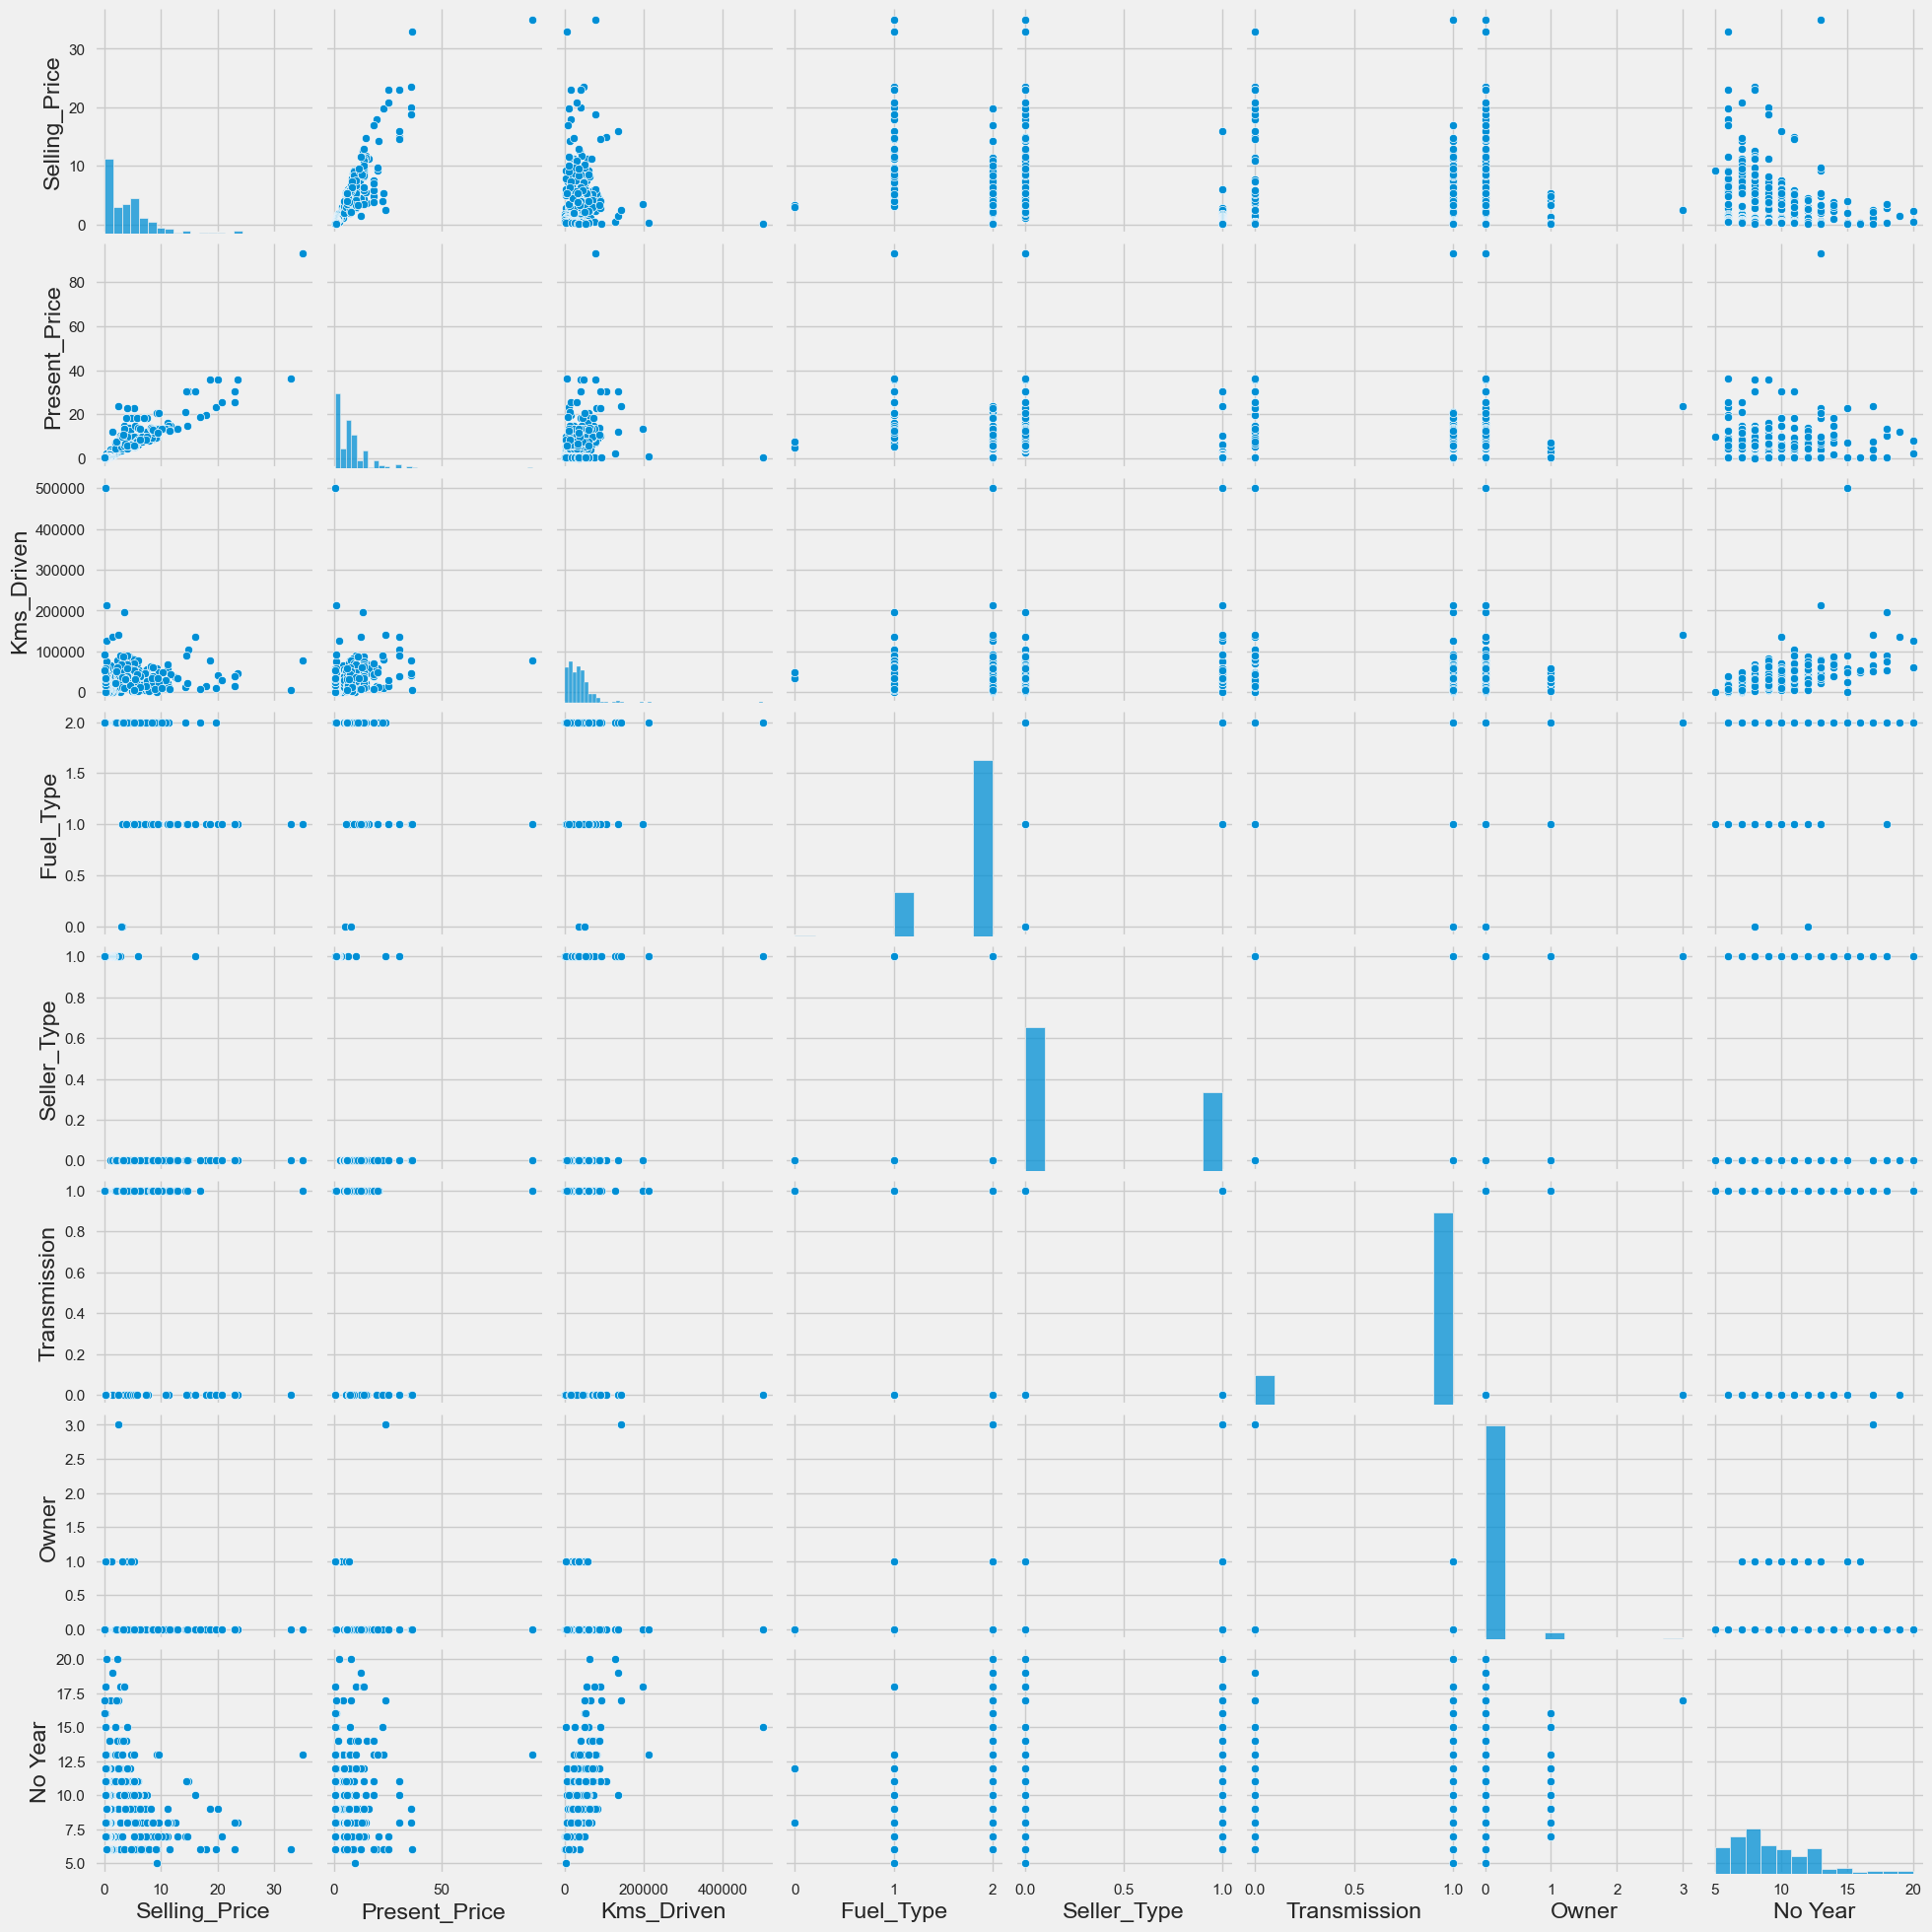

In [65]:
sns.pairplot(df)

In [66]:
from autoviz.classify_method import data_cleaning_suggestions 

This library gives us suggentions to clean the dataset

In [67]:
data_cleaning_suggestions(df)

Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nullpercent,NuniquePercent,dtype,Nuniques,Nulls,Least num. of categories,Data cleaning improvement suggestions
Selling_Price,0.000000,51.827243,float64,156,0,0,right skewed distribution: cap or drop outliers
Present_Price,0.000000,48.837209,float64,147,0,0,right skewed distribution: cap or drop outliers
Kms_Driven,0.000000,68.438538,int64,206,0,0,
Fuel_Type,0.000000,0.996678,int32,3,0,0,
Seller_Type,0.000000,0.664452,int32,2,0,0,
Transmission,0.000000,0.664452,int32,2,0,0,
Owner,0.000000,0.996678,int64,3,0,0,
No Year,0.000000,5.315615,int64,16,0,0,


In [68]:
df.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'No Year'],
      dtype='object')

In [69]:
col=['Selling_Price', 'Present_Price', 'Kms_Driven','No Year']

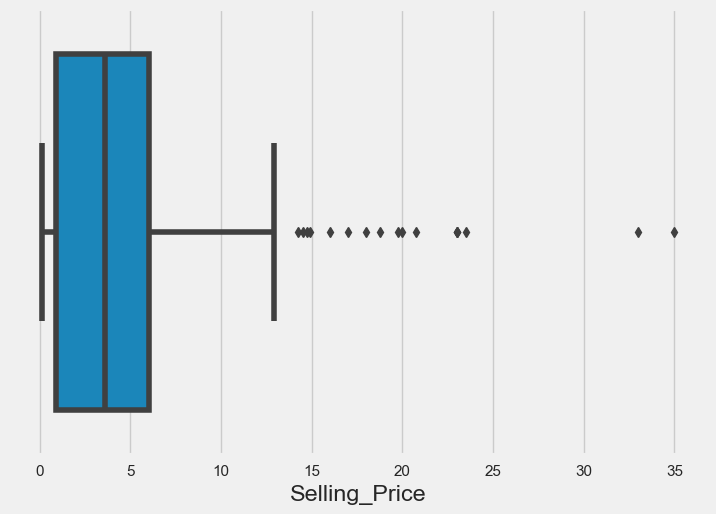

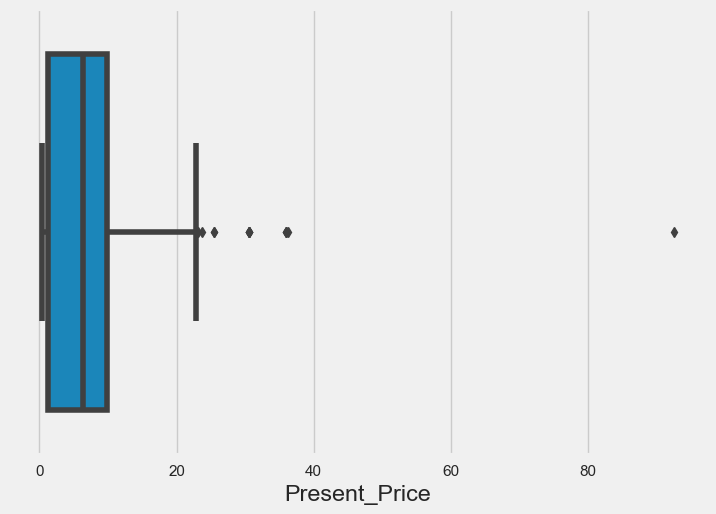

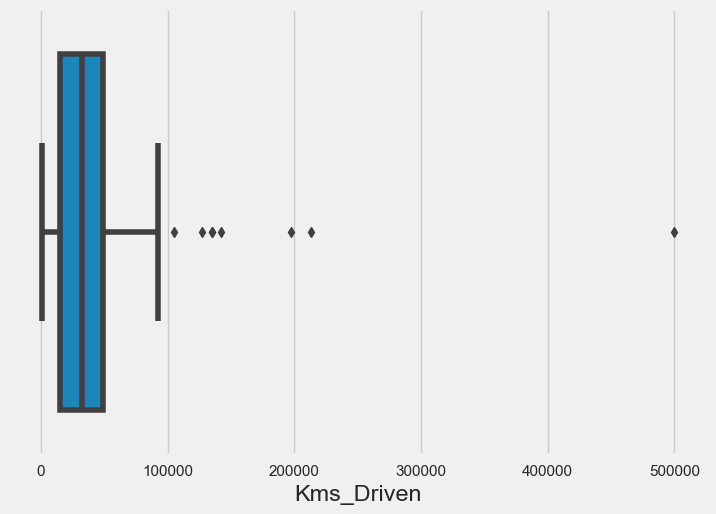

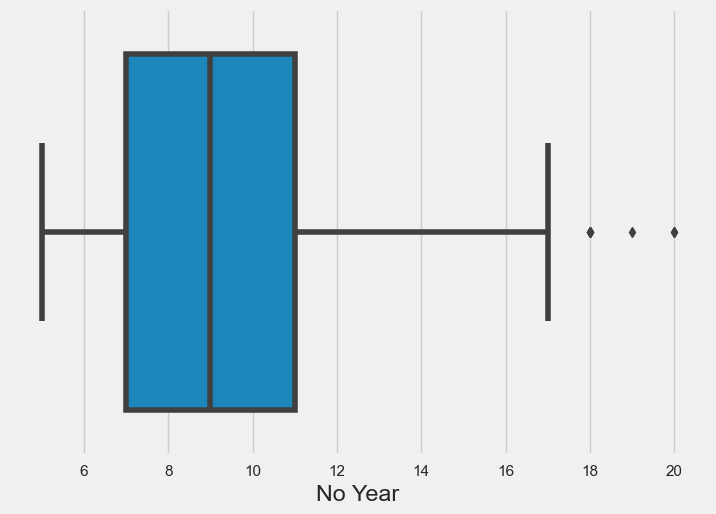

In [70]:
for i in col:
    sns.boxplot(data=df,x=i)
    plt.show()

In [71]:
q1=np.percentile(df['Selling_Price'],25,interpolation='midpoint')
q2=np.percentile(df['Selling_Price'],50,interpolation='midpoint')
q3=np.percentile(df['Selling_Price'],75,interpolation='midpoint')
IQR=q3-q1
low_lim=q1-1.5*IQR
upp_lim=q3+1.5*IQR
print('lower limit',low_lim)
print('high limit',upp_lim)

lower limit -6.749999999999999
high limit 13.649999999999999


In [72]:
df=df[(df['Selling_Price']<upp_lim)]

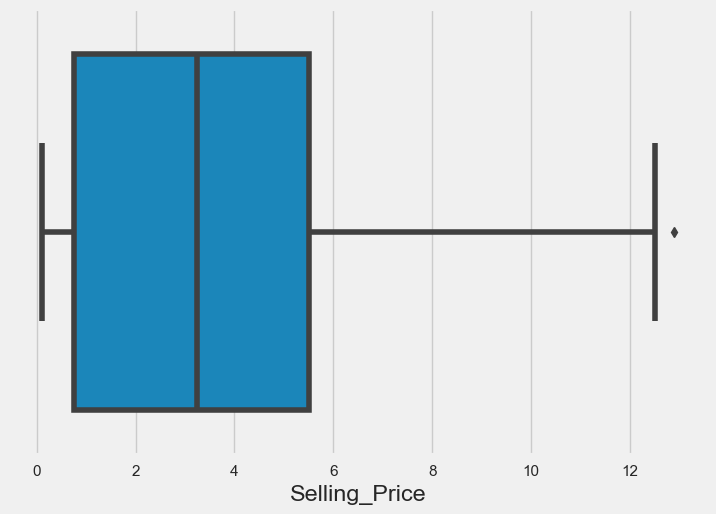

In [73]:
sns.boxplot(data=df,x='Selling_Price')
plt.show()

In [74]:
q1=np.percentile(df['Present_Price'],25,interpolation='midpoint')
q2=np.percentile(df['Present_Price'],50,interpolation='midpoint')
q3=np.percentile(df['Present_Price'],75,interpolation='midpoint')
IQR=q3-q1
low_lim=q1-1.5*IQR
upp_lim=q3+1.5*IQR
print('lower limit',low_lim)
print('high limit',upp_lim)

lower limit -11.55
high limit 21.97


In [75]:
df=df[(df['Present_Price']<upp_lim)]

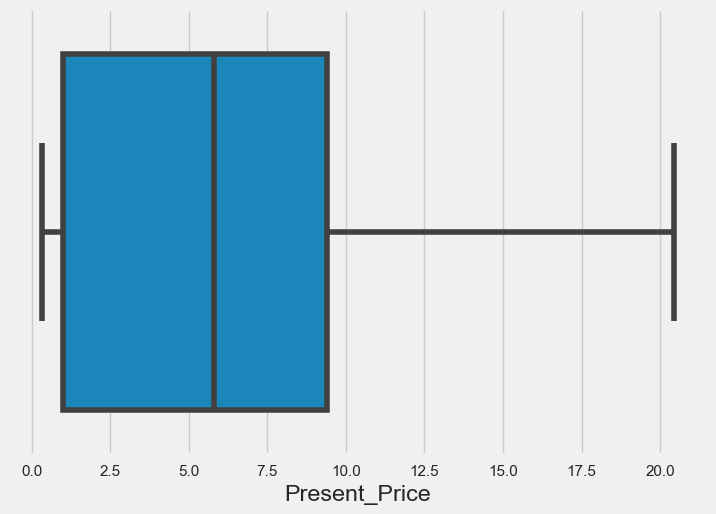

In [76]:
sns.boxplot(data=df,x='Present_Price')
plt.show()

In [77]:
q1=np.percentile(df['Kms_Driven'],25,interpolation='midpoint')
q2=np.percentile(df['Kms_Driven'],50,interpolation='midpoint')
q3=np.percentile(df['Kms_Driven'],75,interpolation='midpoint')
IQR=q3-q1
low_lim=q1-1.5*IQR
upp_lim=q3+1.5*IQR
print('lower limit',low_lim)
print('high limit',upp_lim)

lower limit -32559.0
high limit 94265.0


In [78]:
df=df[(df['Kms_Driven']<upp_lim)]

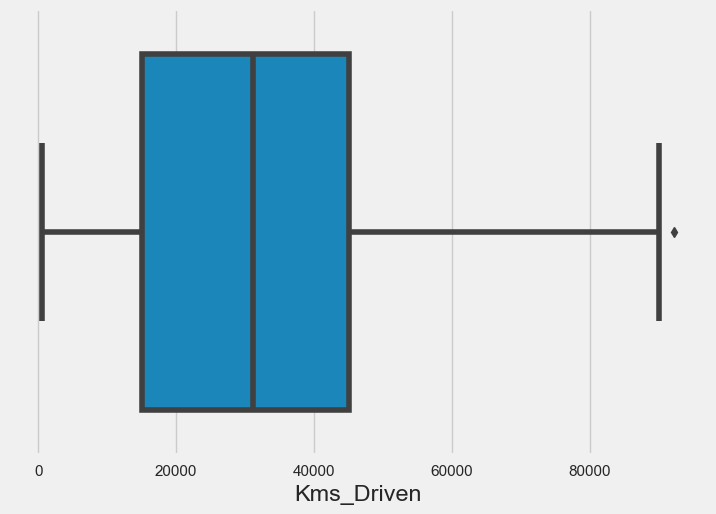

In [79]:
sns.boxplot(data=df,x='Kms_Driven')
plt.show()

In [80]:
q1=np.percentile(df['No Year'],25,interpolation='midpoint')
q2=np.percentile(df['No Year'],50,interpolation='midpoint')
q3=np.percentile(df['No Year'],75,interpolation='midpoint')
IQR=q3-q1
low_lim=q1-1.5*IQR
upp_lim=q3+1.5*IQR
print('lower limit',low_lim)
print('high limit',upp_lim)

lower limit 1.0
high limit 17.0


In [81]:
df=df[(df['No Year']<upp_lim)]

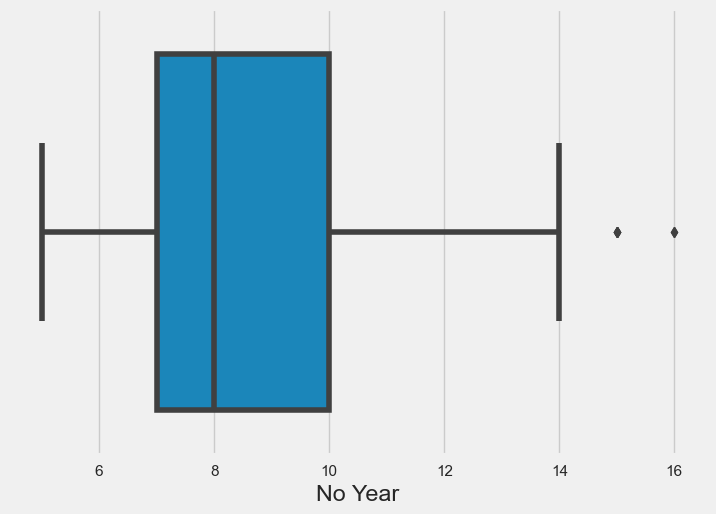

In [82]:
sns.boxplot(data=df,x='No Year')
plt.show()

0.6786387834932643


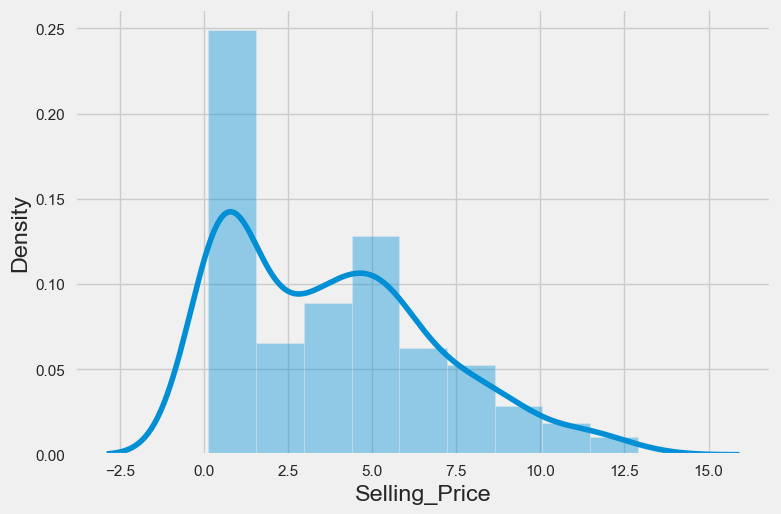

0.6903349971464691


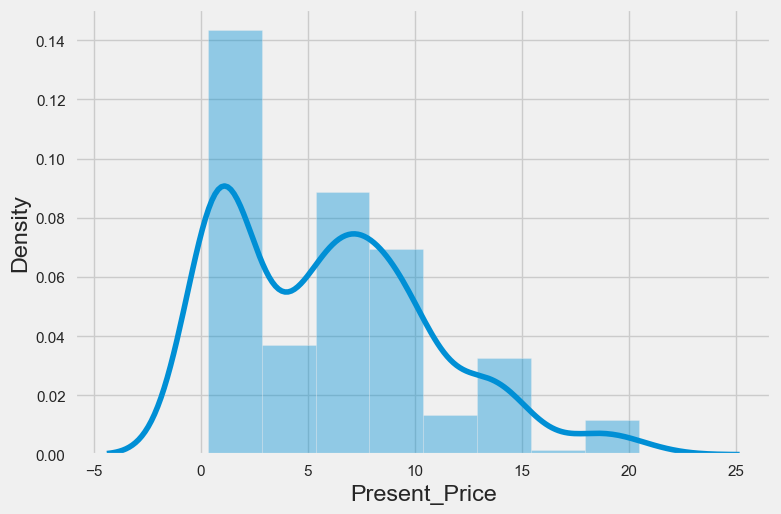

0.44082813290020406


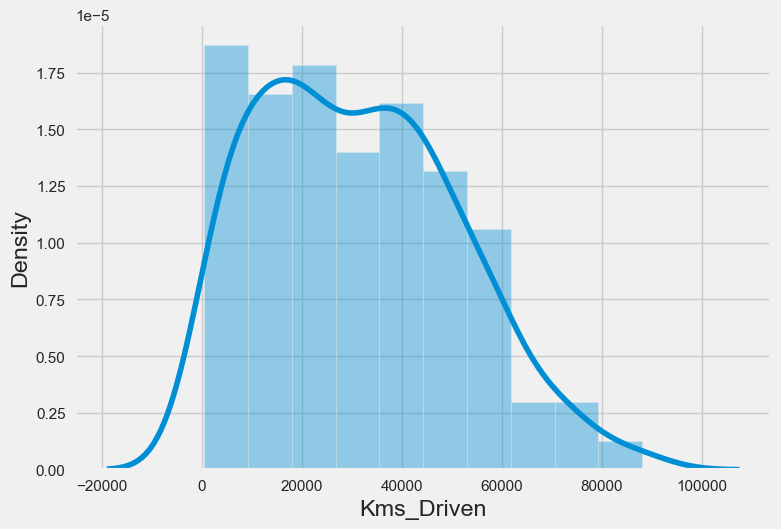

0.7743305943045751


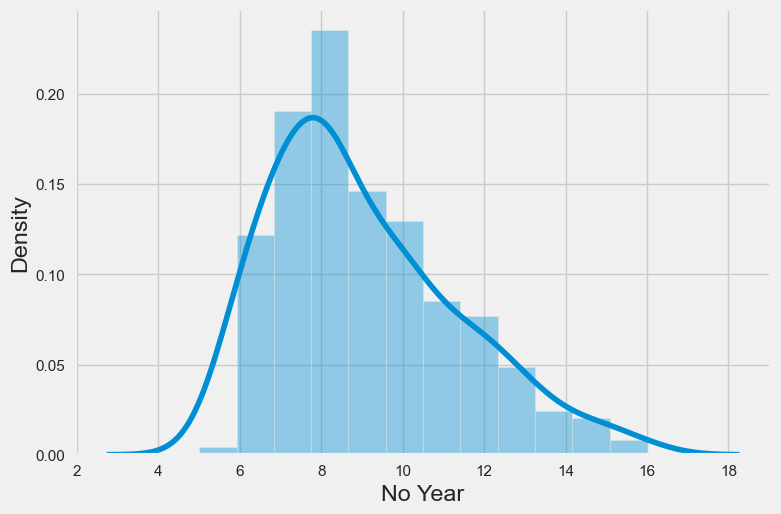

In [83]:
from scipy.stats import skew
for i in col:
    print(skew(df[i]))
    sns.distplot(df[i])
    plt.show()

In [90]:
df

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No Year
0,3.35,5.59,27000,2,0,1,0,9
1,4.75,9.54,43000,1,0,1,0,10
2,7.25,9.85,6900,2,0,1,0,6
3,2.85,4.15,5200,2,0,1,0,12
4,4.60,6.87,42450,1,0,1,0,9
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,1,0,1,0,7
297,4.00,5.90,60000,2,0,1,0,8
298,3.35,11.00,87934,2,0,1,0,14
299,11.50,12.50,9000,1,0,1,0,6


# Features selection

In [91]:
x=df.iloc[:,1:]

In [92]:
y=df.iloc[:,0]

In [93]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [94]:
#hyperparameters

gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
print(gbr_params)

{'n_estimators': 1000, 'max_depth': 3, 'min_samples_split': 5, 'learning_rate': 0.01, 'loss': 'ls'}


In [95]:
from sklearn.ensemble import GradientBoostingRegressor
Gbr=GradientBoostingRegressor(**gbr_params)
Gbr.fit(xtrain,ytrain)

GradientBoostingRegressor(learning_rate=0.01, loss='ls', min_samples_split=5,
                          n_estimators=1000)

In [96]:
train=Gbr.score(xtrain,ytrain)
train

0.9939714591940398

In [97]:
test=Gbr.score(xtest,ytest)
test

0.9470185032562728

In [98]:
print(Gbr.feature_importances_)

[0.86671379 0.01544357 0.01515406 0.01289966 0.00103786 0.
 0.08875106]


This plot shows that which column is more important for my dataset

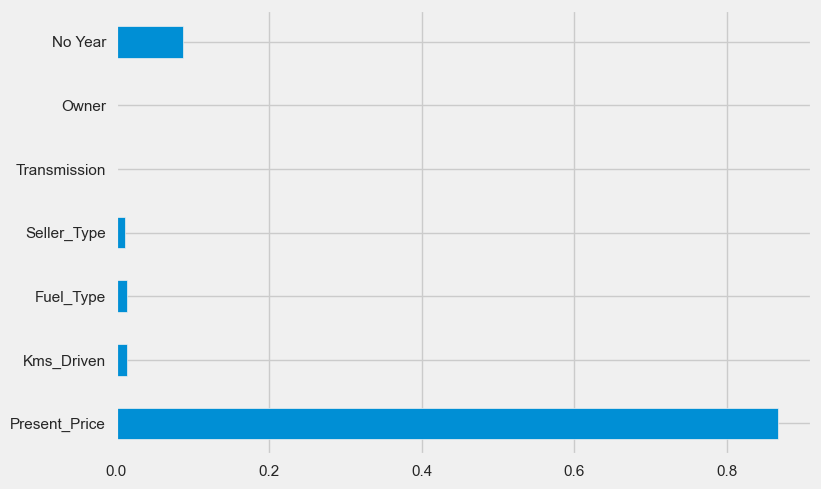

In [99]:
feat_importance=pd.Series(Gbr.feature_importances_,index=x.columns)
feat_importance.plot(kind="barh")
plt.show()

In [100]:
ypred=Gbr.predict(xtest)

In [101]:
ypred

array([3.28712531, 0.62516804, 2.19440679, 0.5810926 , 3.96051743,
       0.47093401, 3.58939658, 5.56322353, 3.12085587, 3.58739599,
       2.4700838 , 9.56231097, 5.1121685 , 1.30688535, 3.4121859 ,
       3.4121859 , 6.8942655 , 4.5109369 , 0.58436426, 6.98877146,
       3.91994011, 4.47194537, 8.35952262, 1.64810264, 9.91087199,
       7.2928086 , 3.78874721, 5.27238742, 0.90882971, 2.70768702,
       0.87906761, 5.14787446, 0.535021  , 2.75565337, 5.2166394 ,
       6.72179421, 0.63740497, 4.04633807, 0.52687926, 0.4594304 ,
       2.61078231, 0.52310536, 0.30661657, 2.85474097, 1.37303713,
       5.26611428, 1.39536252, 2.50187809, 1.10604653, 4.53683594,
       7.77675153, 0.53728032, 2.77677388, 3.01375005])

<Axes: xlabel='Selling_Price', ylabel='Density'>

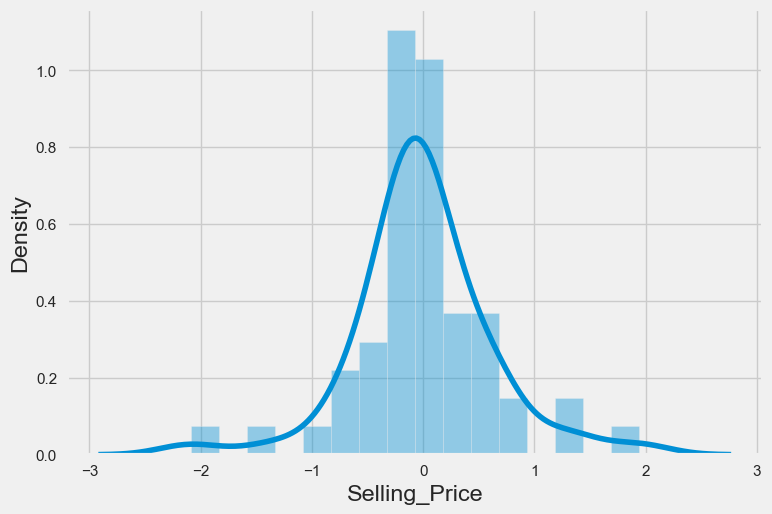

In [102]:
#This basically shows that the model we created gives us very good result

sns.distplot(ytest-ypred)

joblib helps to save the analysis file 

In [103]:
import joblib

In [104]:
joblib.dump(Gbr,"CAR_PREDICTION")

['CAR_PREDICTION']

In [105]:
import pandas as pd
data_new=pd.DataFrame({
    'Present_Price':9.85,
    "Kms Driven":6900,
    "Fuel_Type":2,
    "Seller_Type":0,
    "Transmission":1,
    "Owner":3,
    "No Year":6
},index=[0])

In [106]:
Gbr.predict(data_new)

array([7.77568615])

# To make the GUI we use tinkter

In [107]:
from tkinter import *
import joblib

x=df.iloc[:,1:]
y=df.iloc[:,0]


# To make the GUI we train all the dataset

In [108]:
Gbr=GradientBoostingRegressor(**gbr_params)
Gbr.fit(x,y)

GradientBoostingRegressor(learning_rate=0.01, loss='ls', min_samples_split=5,
                          n_estimators=1000)

In [109]:
import joblib
joblib.dump(Gbr,"CAR_PREDICTION")

['CAR_PREDICTION']

In [110]:
from tkinter import *
import joblib

In [ ]:
def car():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
 
    
    model=joblib.load("CAR_PREDICTION")
    data_new=pd.DataFrame({
    'Present_Price':p1,
    "Kms Driven":p2,
    "Fuel_Type":p3,
    "Seller_Type":p4,
    "Transmission":p5,
    "Owner":p6,
    "No Year":p7,
   
},index=[0])
    result=model.predict(data_new)
    Label(cp,text="Car Purchase Amount").grid()
    Label(cp,text=result).grid(row=10)
    print("car purchase amount",result[0])
    



cp=Tk()
cp.title("Predicted the car future value by using Ml")


label=Label(cp,text="Predicted the car future value by using Ml",
           bg="black",fg="white").grid(row=0,columnspan=2)
Label(cp,text="Present_Price").grid(row=1)
Label(cp,text="Kms Driven").grid(row=2)
Label(cp,text="Fuel_Type(CNG:0,Diesel:1,Petrol:2)").grid(row=3)
Label(cp,text="Seller_Type(Delear:0,Individual:1)").grid(row=4)
Label(cp,text="Transmission(Autometic:0,Manual:1)").grid(row=5)
Label(cp,text="Owner(0,1,3)").grid(row=6)
Label(cp,text="No Year").grid(row=7)


e1=Entry(cp)
e2=Entry(cp)
e3=Entry(cp)
e4=Entry(cp)
e5=Entry(cp)
e6=Entry(cp)
e7=Entry(cp)


e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)


Button(cp,text="Predict",command=car).grid()
mainloop()



car purchase amount 1.8148057577177124
